In [646]:
import numpy as np
import matplotlib.pyplot as plt

# Necessary Metadata

* Name/Initials
    * JHED
* Date
    * Start & end
* Time
    * Start & end
* Chemicals
    * Reaction
    * Compound
        * Associated hazards
    * Transport Agent
    
* Reaction
    * Temperatures
        * Start
        * Step
        * Dwell
        * Step Down
        * End



In [ ]:
import os
# Could just annotate a plot, I don't like that idea
# Write data to text file?
    # How do we add plot to the file?
# Write data into pdf?
    # Plot could be added to pdf somewhat easily (hopefully)
    # Don't know how I would add both text AND plots (maybe it's easy)

In [662]:
def HideSpines(ax:
    """This is just a function to hide the top and right spines on a plt diagram because I do it so often"""
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return

In [816]:
class Identity:
    def __init__(self, name, jhed, page=""): # sam.page returns FALSE when page=""
        # Only one of these?
        self.name = name
        self.jhed = jhed
        self.page = page
    # Shenanigans
    def NotebookNumber(self, page):
        """Assign page number to experiment"""
        self.page = page
        return 
    
    # Plotting shenanigans
    # Assumes the subplot is a 1x1 square
    def AnnotateName(self, ax):
        """Define positions of each element relative to the name of experimenter. Annotate name of experimenter"""
        pos = (0,1)
        ax.annotate(f"{self.name}", pos, ha="left", c="k")
        return pos
    def AnnotateJHED(self, ax):
        """Annotate name of experimenter"""
        pos = self.AnnotateName(ax)
        ax.annotate(f"{self.jhed}", (0, pos[1]-0.25), c="k")
        return
    def AnnotateEmail(self, ax):
        """Annotate name of experimenter"""
        pos = self.AnnotateName(ax)
        ax.annotate(f"{self.jhed}@jhu.edu", (0, pos[1]-0.5), c="k")
        return
    def AnnotateNotebookNumber(self, ax):
        """Annotate name of experimenter"""
        pos = self.AnnotateName(ax)
        ax.annotate(f"{self.page}", (0, pos[1]-0.75), c="k")
        return
    
    
sam = Identity("Sam", "sdawley1")
sam.NotebookNumber("SD-1-55")
sam.NotebookNumber("SD-1-56")
if sam.page:
    print(f"Page 1: {sam.page}")
    
sam.NotebookNumber("")
if sam.page:
    print(f"Page 2: {sam.page}")
    
pos = (0,1)
pos = tuple([i-1 for i in pos])
print(pos[0])

Page 1: SD-1-56
-1


In [809]:
class Chemicals:
    def __init__(self, compound, transport_agent=""):
        self.compound = compound
        self.ta = transport_agent

    # Plotting shenanigans
    # Assumes the subplot is a 1x1 square
    def AnnotateCompound(self, ax):
        """Define positions of each element relative to the name of experimenter. Annotate name of experimenter"""
        pos = (1,1)
        ax.annotate(f"{self.compound} Synthesis", pos, ha="right", c="k")
        return pos
    def AnnotateTransportAgent(self, ax):
        """Annotate name of experimenter"""
        pos = self.AnnotateCompound(ax)
        if self.ta:
            ax.annotate(f"Transport Agent: {self.ta}", (1, pos[1]-0.25), ha="right", c="k")
        return
        
oxide = Chemicals("Ba2O3", "I2")
oxide.ta

'I2'

In [793]:
class SpaceTime:
    def __init__(self, start_date, start_time, end_date="", end_time=""):
        if len(str(start_date)) != 8 or len(str(end_date)) != 8:
            raise ValueError("Date must be in 'YYYYMMDD' format")
        if len(str(start_time)) < 3 or len(str(start_time)) > 4:
            raise ValueError("Invalid time")
        self.start_date = str(start_date) # YYYYMMDD # Start of experiment
        self.end_date = str(end_date) # YYYYMMDD # End of experiment
        self.start_time = str(start_time) if len(str(start_time)) == 4 else f"0{start_time}" # 24-hr clock 
        self.end_time = str(end_time) if len(str(end_time)) == 4 else f"0{end_time}" # 24-hr clock 
        return
    ## 
    def EndDate(self, end):
        """Define end date of experiment"""
        self.end_date = end
        return
    def EndTime(self, time):
        """Define end time of experiment"""
        self.end_time = time
        return
    def FormatDate(self, date):
        """Change date format to something readable. Using MM/DD/YYYY."""
        m, d, y = date[4:6], date[6:], date[:4] # Get month, day, year
        return "{:s}/{:s}/{:s}".format(m, d, y)
    def Format24hrTime(self, time):
        """Change the time format to something (more) readable using a 24 hr clock"""
        return "{}:{}".format(int(time[:2])%24, time[2:])
    def Format12hrTime(self, time):
        """Change the time format to something (more) readable using a 12 hr clock"""
        hour_24, mn = int(time[:2]), time[2:] # Get 24 hr representation of time
        hr = hour_24 % 12 if hour_24 != 12 else hour_24 # Convert to 12 hr representation
        meridiem = "AM" if hour_24 < 12 else "PM" # TEMPORARY: Assumes nobody runs experiments at midnight
        return "{}:{} {}".format(hr, mn, meridiem)
    
    # Plotting shenanigans
    # Assumes the subplot is a 1x1 square
    def AnnotateStart(self, ax):
        """
        Annotate the start date (and time) of the experiment
        Returns
        -------
        pos (tuple) = position of annotation to be used later for other date/time annotations
        """
        pos = (0.25,1)
        date = self.FormatDate(self.start_date)
        if self.start_time:
            time = self.Format12hrTime(self.start_time)
            ax.annotate(f"Start: {date}, {time}", pos, ha="left", c="k") 
        else:
            ax.annotate(f"Start: {date}", pos, ha="left", c="k")
        return pos
    def AnnotateEnd(self, ax):
        """Annotate the end date (and time) of the experiment"""
        pos = self.AnnotateStart(ax)
        date = self.FormatDate(self.end_date)
        if self.end_time:
            time = self.Format12hrTime(self.end_time)
            ax.annotate(f"End: {date}, {time}", (0.25, pos[1]-0.25), ha="left", c="k") 
        else:
            ax.annotate(f"End: {date}", (0.25, pos[1]-0.25), ha="left", c="k")
        return

In [724]:
class ReactionDiagram:
    def __init__(self, heat_time, dwell_time, cool_time, initial_temp, dwell_temp, final_temp):
        self.times = {"up":heat_time, "dwell":dwell_time, "down":cool_time} # hr # Relies on dict naming
        self.function_times = (
            0,
            heating_time,
            dwell_time + heating_time,
            cool_time + dwell_time + heating_time,
        )
        self.total_time = sum(self.times.values())
        self.temperatures = (initial_temp, dwell_temp, final_temp) # celsius
        return
    
    # Shenanigans
    def GetTemperatures(self):
        """Get temperatures of each step"""
        return self.temperatures
    def GetTimeIntervals(self):
        """Get time intervals"""
        return tuple(self.times.values())
    def GetFunctionalTimes(self):
        """Get functional times"""
        return self.function_times
    
    # Temperature shenanigans
    def TimeContribution(self, initial_time, final_time):
        """
        Calculate contribution of a single time domain within the diagram to the total time
        Returns
        -------
        Integer percentage of time contributed
        """
        percentage = (np.absolute(final_time - initial_time)/self.total_time)*100
        return int(np.floor(percentage))
    def TemperatureRate(self, initial_temp, final_temp, initial_time, final_time):
        """
        Get rate of temperature change
        Returns
        -------
        Rate of temperature change over specificed time and temp interval
        """
        return (final_temp - initial_temp) / (final_time - initial_time) 
    def TemperatureFromTime(self, time, initial_time, final_time, initial_temp, final_temp):
        """
        Get temperature as a function of time
        Returns
        -------
        # Equation for line of temperature as a function of time
        Temperature at time `time`
        """
        slope = self.TemperatureRate(initial_temp, final_temp, initial_time, final_time)
        return slope*(time-initial_time) + initial_temp
    def HeatingCoolingDwellingVector(self, initial_time, final_time, initial_temp, final_temp):
        """
        Generate a vector of temperatures as a function of time. 
        This is over only a single time domain on the diagram
        Returns
        -------
        Tuple of (time, temperature) pairs of length proportional to contribution to total time
        """
        time_array = np.linspace(initial_time, final_time, self.TimeContribution(initial_time, final_time))
        if initial_temp == final_temp: # Check if dwelling
            z = [initial_temp for _ in time_array]
        else: # If not dwelling, algorithm to create heating/cooling vector
            z = [self.TemperatureFromTime(t, initial_time, final_time, initial_temp, final_temp) for t in time_array]
        return time_array, np.array(z)
    def StartEndVector(self, temp, piece):
        """
        Builds piece of diagram for starting and ending steps.
        piece (int) is a bit to denote whether the piece is for the beginning or end
            piece = 0 denotes the starting piece. Any other character denotes the ending piece.
        Returns
        -------
        Tuple of (time, temperature) pairs of length which is 5% of the total time
        """
        contribution = self.TimeContribution(self.total_time/7, 2*self.total_time/7)
        length = self.total_time * contribution/100
        if piece == 0:
            time_array = np.linspace(self.function_times[0]-length, self.function_times[0], contribution)
        else:
            time_array = np.linspace(self.function_times[-1], self.function_times[-1]+length, contribution)
        z = [temp for _ in time_array]
        return time_array, np.array(z)
    
    def CreateStepVectors3(self, temps, functional_times):
        """
        Create vectors for plotting. Assumes three steps (excluding start and end steps).
        Params
        ------
        temps (array) = list of 3 temperatures for each step in reaction diagram
        functional_times (array) = list of 4 times to begin each step vector (~ tail of the vector)
        """
        steps = {}
        # Start
        steps["start"] = self.StartEndVector(temps[0], 0)
        # Ramp up
        steps["up"] = self.HeatingCoolingDwellingVector(
            functional_times[0], functional_times[1], temps[0], temps[1]
        )
        # Dwell
        steps["dwell"] = self.HeatingCoolingDwellingVector(
            functional_times[1], functional_times[2], temps[1], temps[1]
        )
        # Ramp down
        steps["down"] = self.HeatingCoolingDwellingVector(
            functional_times[-2], functional_times[-1], temps[-2], temps[-1]
        )
        # End 
        steps["end"] = self.StartEndVector(temps[-1], 1)
        return steps
    
    # Plotting shenanigans
    # Should plotting be a different class entirely?
    # NOT as optimized as it should be
    def PlotStepVectors3(self, ax, steps, temps): 
        # Is this function necessary? More annoying to control color, lw, etc., using it imo
        # Maybe combine with AnnotateStepVectors3()? Separate rn for better control over display
        """
        Plot steps on reaction diagram
        Params
        ------
        ax (axis) = axis to plot onto. Must of be of type returned by pyplot.subplots()
        steps (dict) = dictionary of step vectors returned from CreateStepVectors3()
        temps (array) = temperatures for each step in the reaction diagram
        """
        for key,vector in steps.items():
            # Plotting series
            ax.plot(vector[0], vector[1], c="k", lw=2) 
        return
    def AnnotateTemperatures3(self, ax, steps):
        """
        Annotate temperatures on reaction diagram
        Params
        ------
        ax (axis) = axis to plot onto. Must of be of type returned by plt.subplots()
        steps (dict) = dictionary of step vectors returned from CreateStepVectors3()
        """
        # Annotation
        translate = 10 # Shift text so it doesn't overlap with plot
        for key, vector in steps.items():
            if key != "up" and key != "down":
                initial_time, initial_temp = vector[0][0], vector[1][0] # Get time, temperature
                ax.annotate(
                    f"{initial_temp}\N{DEGREE SIGN}C",
                    (initial_time, initial_temp+translate),
                    ha="left", fontsize=12
                )   
        return
    def AnnotateTimes3(self, ax, steps):
        """
        Annotate times on reaction diagram
        Params
        ------
        ax (axis) = axis to plot onto. Must of be of type returned by plt.subplots()
        steps (dict) = dictionary of step vectors returned from CreateStepVectors3()
        """
        ii = 0
        time_intervals = self.times
        # Annotation
        for key, vector in steps.items():
            if key != "start" and key != "end":
                initial_time, final_time = vector[0][0], vector[0][-1] # Get start and end time for domain
                ax.annotate(
                    f"{time_intervals[key]} hr", # This is a band-aid fix
                    # Relies on the order in which key:vals are added to the dictionary
                    ((initial_time+final_time)/2, np.min(self.GetTemperatures())),
                    ha="center", fontsize=10
                )
                ii += 1     
        return
            

In [811]:
dwell = ReactionDiagram(12, 72, 48, 55, 1200, 25)
times = dwell.GetTimeIntervals()
function_times = dwell.function_times
temps = dwell.temperatures

start = dwell.StartEndVector(temps[0], 0)
#
heating = dwell.HeatingCoolingDwellingVector(function_times[0], function_times[1], temps[0], temps[1])
hot = dwell.HeatingCoolingDwellingVector(function_times[1], function_times[2], temps[1], temps[1])
cooling = dwell.HeatingCoolingDwellingVector(function_times[2], function_times[3], temps[1], temps[2])
#
end = dwell.StartEndVector(temps[2], 1)

<IPython.core.display.Javascript object>


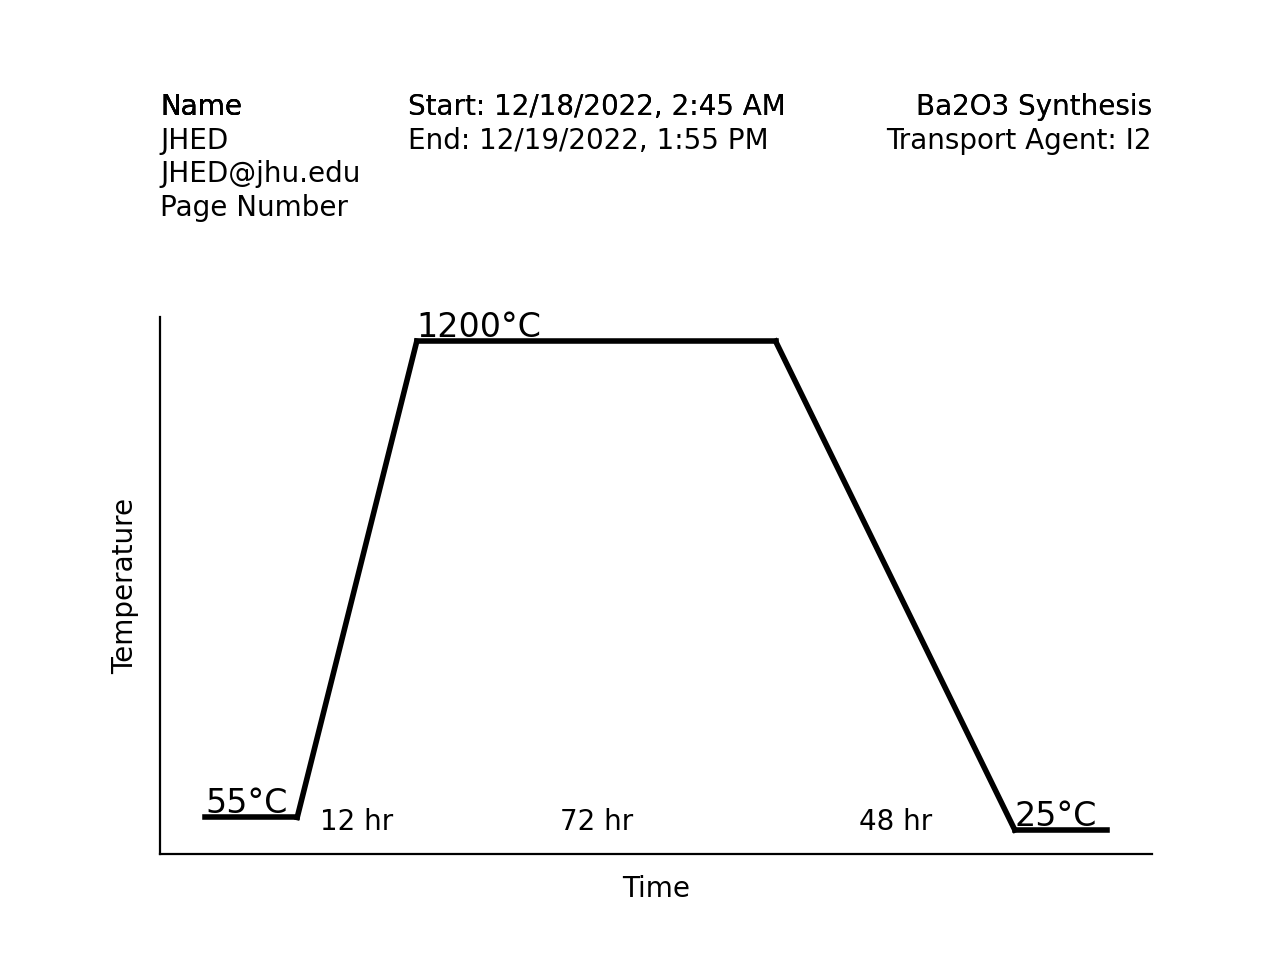

In [817]:
fig, ax = plt.subplots(nrows=2, ncols=1, gridspec_kw={"height_ratios": [1, 4]})
## Reaction Diagram
temps = dwell.GetTemperatures()
times = dwell.GetFunctionalTimes()
steps = dwell.CreateStepVectors3(temps, times)
##
new = dwell.PlotStepVectors3(ax[1], steps, temps)
old = dwell.AnnotateTemperatures3(ax[1], steps)
mid = dwell.AnnotateTimes3(ax[1], steps)

## Experimenter Identity
sam = Identity("Name", "JHED")
sam.NotebookNumber("Page Number")
sam.AnnotateName(ax[0])
sam.AnnotateJHED(ax[0])
sam.AnnotateEmail(ax[0])
sam.AnnotateNotebookNumber(ax[0])

## Date, Location, Time, etc.
spacetime = SpaceTime(20221218, 245, 20221219, 1355)
spacetime.AnnotateStart(ax[0])
spacetime.AnnotateEnd(ax[0])


## Chemicals and Such
chemical = Chemicals("Ba2O3", "I2")
chemical.AnnotateCompound(ax[0])
chemical.AnnotateTransportAgent(ax[0])

## Plotting shenanigans
plt.xticks([])
plt.yticks([])
plt.xlabel("Time")
plt.ylabel("Temperature")

HideSpines(ax[0])
HideSpines(ax[1])

# More plotting shenanigans
ax = ax[0]
ax.set_xticks([])
ax.set_yticks([])
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.savefig("Demo.png")

In [687]:
if __name__ == "__main__":
    time = SpaceTime(20221218, 245, 20221219, 1355)
    
    a = time.Format12hrTime(time.start_time)
    b = time.Format24hrTime(time.end_time)
    print("12 Hour Represenation: {}".format(a))
    print("24 Hour Represenation: {}".format(b))

    c = time.FormatDate(time.start_date)
    d = time.FormatDate(time.end_date)
    print("Date (MM/DD/YYYY): {}".format(c))
    print("Date (MM/DD/YYYY): {}".format(d))

12 Hour Represenation: 2:45 AM
24 Hour Represenation: 13:55
Date (MM/DD/YYYY): 12/18/2022
Date (MM/DD/YYYY): 12/19/2022
